<a href="https://colab.research.google.com/github/gyurihan/python_study/blob/main/%EB%B3%B5%EC%9E%A1%EA%B3%84%EC%BD%94%EB%94%A9_5_14_~_5_19_%ED%95%9C%EA%B7%9C%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 복잡계 과제 5.14 ~ 5.19

#### 융합대학원 소셜데이터사이언스전공 20222211 한규리

---

### 5.14

각기 다른 재연결 확률 p를 사용해 만들어진 와츠-스트로가츠 네트워크의 평균 최단 경로 길이(l)와 평균 뭉침 계수(C)를 계산해, 그림 5.5(b)를 재현하라.

0과 1 사이를 20개로 균등 분배한 p 값을 활용하라. 각각의 p값에 대해 20개의 다른 네트워크를 만들고, l과 C의 평균을 계산한다.

동일한 y축을 사용하는 2개의 곡선을 그리려면, 해당 값들을 p=0인 네트워크에서의 <l>과 C로 나누어 정규화해야 한다.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# G에 대한 평균 최단 길이와 평균 뭉침계수 계산
def compute_network(G):
    return nx.average_shortest_path_length(G), nx.average_clustering(G)

# 네트워크 매개변수
N, K, num_trials = 1000, 4, 20
p_values = np.linspace(0, 1, 20)  # 재연결 확률 p 값

# 계산 결과를 저장할 리스트
L_avg, C_avg = [], []


# 각 p값에 대한 계산
for p in p_values:
    metrics = [compute_network(nx.watts_strogatz_graph(N, K, p)) for _ in range(num_trials)]
    L_avg.append(np.mean([m[0] for m in metrics]))
    C_avg.append(np.mean([m[1] for m in metrics]))

# 정규화
L0, C0 = L_avg[0], C_avg[0]
normalized_L = [L / L0 for L in L_avg]
normalized_C = [C / C0 for C in C_avg]


# 그래프 그리기
plt.plot(p_values, normalized_L, label='Normalized L')
plt.plot(p_values, normalized_C, label='Normalized C')
plt.xlabel('p')
plt.ylabel('Normalized values')
plt.legend()
plt.title('Watts-Strogatz Network')
plt.show()

###5.15

연결선 수가 4이고, 1000개의 노드로 구성된 와츠-스트로가츠 네트워크를 만들고, 재연결 확률을 사용하라.

그 네트워크들의 연결선 수 분포를 계산하고, 같은 도표에 연결선 수 분포를 그려 서로 비교하라.

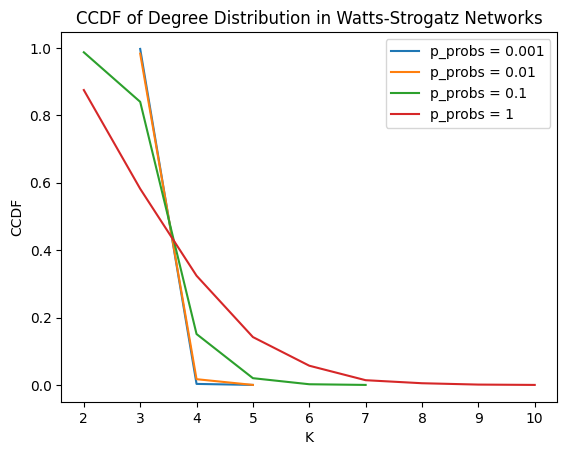

In [26]:
# 연결선 수에 대한 CCDF 계산
def CCDF(degrees):
    degree_freq = {d: 0 for d in degrees}
    for degree in degrees:
        degree_freq[degree] += 1

    sorted_degrees = sorted(degree_freq)
    N = len(degrees)
    cumulative = 0
    ccdf_values = {}
    for degree in sorted_degrees:
        cumulative += degree_freq[degree]
        ccdf_values[degree] = 1 - cumulative / N

    return ccdf_values

# 네트워크 생성 및 CCDF 계산
p_values = [0.001, 0.01, 0.1, 1]
for p in p_values:
    G = nx.watts_strogatz_graph(1000, 4, p)
    ccdf = CCDF([degree for _, degree in G.degree()])

    plt.plot(list(ccdf.keys()), list(ccdf.values()), label=f'p_probs = {p}')

plt.xlabel('K')
plt.ylabel('CCDF')
plt.title('CCDF of Degree Distribution in Watts-Strogatz Networks')
plt.legend()
plt.show()


### 5.18

연결선 수가 m=3인 1000개의 노드들로 이뤄진 BA 네트워크를 구성하라.

5.18.1. 그 네트워크의 연결선 수 분포를 x축과 y축을 로그화해 그려보라.

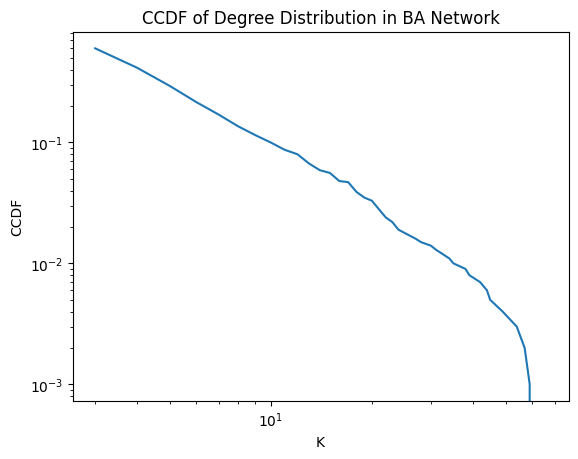

In [27]:
# 연결선수에 대한 CCDF 계산하기
def CCDF(degrees):
    degree_count = {}
    for degree in degrees:
        if degree in degree_count:
            degree_count[degree] += 1
        else:
            degree_count[degree] = 1

    sorted_degrees = sorted(degree_count)
    N = len(degrees)
    cum_count = 0
    ccdf_values = {}
    for degree in sorted_degrees:
        cum_count += degree_count[degree]
        ccdf_values[degree] = 1 - cum_count / N

    return ccdf_values

# BA 네트워크 만들기
BA = nx.barabasi_albert_graph(1000, 3)

# 각 노드의 연결선 수 리스트 만들기
degrees = [degree for _, degree in BA.degree()]

# 연결선 수에 대한 CCDF 계산
ccdf = CCDF(degrees)

# CCDF 그래프 그리기
plt.plot(ccdf.keys(), ccdf.values())
plt.xlabel('K')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.title('CCDF of Degree Distribution in BA Network')
plt.show()


5.18.2. 평균 연결선 수를 찾고, 이를 m과 비교해 결과를 해석해보라.

In [35]:
# 평균 연결선 수 찾기
avg_k = sum(degrees) / len(degrees)
print("avg_k:", avg_k)
print("m:", 3)

# 평균 연결선 수는 m의 2배가 되지 못하기 때문에 모델을 구현하는데 오류가 있거나, 노드를 추가하는 과정에서 다른 요인이 영향을 미쳤을 수 있음

avg_k: 5.982
m: 3


5.18.3. 평균 뭉침 계수를 계산하라.

In [36]:
avg_C = nx.average_clustering(BA)

print("avg_C:", avg_C)

# 평균 뭉침 계수는 약 0.02로 BA 네트워크 모델의 특징이기도 한 평균 뭉침 계수가 매우 낮게 나온 것으로 예상됨

avg_C: 0.02238941341122337


5.18.4. 그래프가 연결되어 있는지 확인하라.

In [39]:
# BA 네트워크의 연결성 확인
is_connected = nx.is_connected(BA)
print(is_connected, "connected")

True connected


5.18.5. 평균 최단 경로를 계산하라.

In [47]:
# 위에서 네트워크 연결성을 확인했기 때문에, 곧바로 평균 최단 경로 확인 가능함
# 평균 최단 경로 길이 계산
APL_BA = nx.average_shortest_path_length(BA)
print("APL_BA:", APL_BA)


APL_BA: 3.510998998998999


### 5.19
이전 문제의 BA 네트워크와 동일한 수의 노드와 링크를 갖는 에르되시-레니 무작위 그래프를 만들어보라.

5.19.1. 연결선 수 분포를 구하고, 이를 BA 네트워크의 연결선 수 분포와 비교하라.
두 연결선 수 분포를 이중 로그화된 그래프로 한 도표에 그려보라.

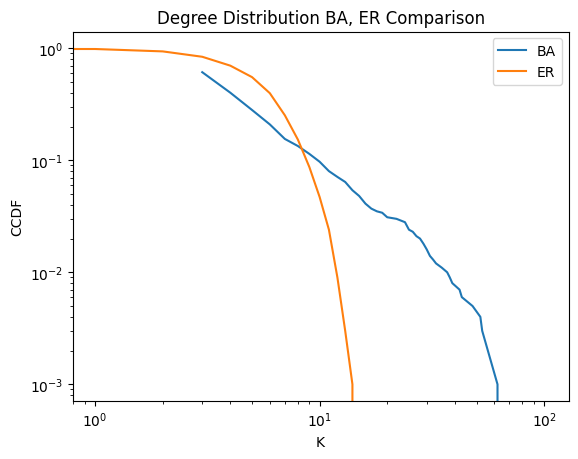

In [44]:
# BA 네트워크 생성
BA = nx.barabasi_albert_graph(1000, 3)

# 에르되시-레니 네트워크 생성
ER = nx.gnm_random_graph(BA.number_of_nodes(), BA.number_of_edges())

# 각 네트워크의 연결선 수 리스트 생성
degrees_BA = [degree for _, degree in BA.degree()]
degrees_ER = [degree for _, degree in ER.degree()]

# 연결선 수에 대한 CCDF 계산
ccdf_BA = CCDF(degrees_BA)
ccdf_ER = CCDF(degrees_ER)

# CCDF 그래프 그리기
plt.loglog(list(ccdf_BA.keys()), list(ccdf_BA.values()), label='BA')
plt.loglog(list(ccdf_ER.keys()), list(ccdf_ER.values()), label='ER')

plt.xlabel('K')
plt.ylabel('CCDF')
plt.title('Degree Distribution BA, ER Comparison')
plt.legend()
plt.show()

#BA 네트워크는 연결선 수 분포가 더 광범위하게 분포하는 반면 ER 네트워크는 균일한 분포를 보임

5.19.2. 평균 뭉침 계수와 평균 최단 경로를 계산하고, 이를 BA 네트워크의 해당 값들과 비교해보라. 결과를 해석하라.

In [58]:
#BA, ER 네트워크 평균 뭉침 계수 비교
print("avg_C_BA:", avg_C)
print("avg_C_ER:", nx.average_clustering(ER))


# ER 네트워크의 연결성 확인

is_connected = nx.is_connected(BA)
print("BA network is:", is_connected, "connected")
print("APL_BA:", APL_BA)

is_connected = nx.is_connected(ER)
print("ER network is:", is_connected, "connected")

ER_components = list(nx.connected_components(ER))
largest_component = max(ER_components, key=len)
ER_gc = ER.subgraph(largest_component)


if len(ER_gc) > 1:  # 컴포넌트가 노드 하나 이상인 경우에만 계산
    average_path_length_ER_gc = nx.average_shortest_path_length(ER_gc)
    print("APL_ER giant component:", average_path_length_ER_gc)
else:
    print("APL_ER giant component은 단일 노드로 계산할 수 없음")

avg_C_BA: 0.02238941341122337
avg_C_ER: 0.005578049728049725
BA network is: True connected
APL_BA: 3.510998998998999
ER network is: False connected
APL_ER giant component: 4.059292104771227


**평균 뭉침 계수** :

BA 네트워크의 평균 뭉침계수가 ER 네트워크에 비해 더 높게 나타남. 이는 BA가 특정 노드들과 연결을 많이 하는 경향이 있기 때문임. ER은 무작위 연결로 인해 삼각형 구조가 더 드물게 나타나고, 뭉침 계수가 일반적으로 낮게 나타남.

**네트워크 연결성** :

BA 네트워크는 연결되었으나, ER 네트워크는 연결되지 않았음.
이는 BA의 대부분의 노드가 다른 부분과 연결되어 있으나, ER은 무작위 연결로 인해 특정한 노드와 연결되지 않았을 수 있음.

**평균 최단 경로 길이** :

ER 네트워크의 거대 컴포넌트는 4.059로 나타남.
이는 ER의 거대 컴포넌트의 평균 최단 경로 길이가 BA 네트워크보다 긴 것으로 나타남. 이는 네트워크 안에 허브가 없기 때문에 평균적으로 한 노드에서 다른 노드로 이동거리가 더 발생하기 때문임.